In [1]:
import pandas as pd
import numpy as np
import io
import os
import time

In this project, we want to implement decision tree and KNN algorithms on different datasets.

The goal is to do three tasks and give an analysis on all of them

# Decision Tree

First we open and set the dataset up.

In [2]:
cols = ["name", "hobby", "age", "edicational level", "material status", "class"]
test_cols = ["hobby", "age", "edicational level", "material status", "class"]

In [3]:
train = pd.read_csv("DT/hayes-roth.data", header=None, names=cols)
test = pd.read_csv("DT/hayes-roth.test", header=None, names=test_cols)

In [4]:
train = train.drop("name", axis = 1)
train.head()

,hobby,age,edicational level,material status,class
0,2,1,1,2,1
1,2,1,3,2,2
2,3,1,4,1,3
3,2,4,2,2,3
4,1,1,3,4,3


In [5]:
test.head()

,hobby,age,edicational level,material status,class
0,1,1,1,2,1
1,1,1,2,1,1
2,1,2,1,1,1
3,1,1,1,3,1
4,1,1,3,1,1


## i)

In this section we want to fit the decision tree on our train dataset and report the train and test accuracies and errors

In order to fulfill our goal, we first determine x and y for test and train datasets.

In [6]:
x_train = train.drop("class", axis = 1)
y_train = train['class']

x_test = test.drop("class", axis = 1)
y_test = test['class']

In [7]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier()
tree_clf = tree_clf.fit(x_train, y_train)

In the following line we measure train accuracy and error

In [8]:
print(f"train accuracy:{tree_clf.score(x_train, y_train)}")
print(f"train error: {1 - tree_clf.score(x_train, y_train)}")

train accuracy:0.9090909090909091
train error: 0.09090909090909094


In [9]:
preds = tree_clf.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 3], dtype=int64)

In the following line we measure test accuracy and error

In [10]:
print(f"test accuracy:{tree_clf.score(x_test, y_test)}")
print(f"test error: {1 - tree_clf.score(x_test, y_test)}")

test accuracy:0.8571428571428571
test error: 0.1428571428571429


In [11]:
from sklearn.metrics import precision_recall_fscore_support

print("test measurements:")
print("   precision \t\t recall \t\t f1score")
print(precision_recall_fscore_support(y_test, preds, average='micro'))
print(precision_recall_fscore_support(y_test, preds, average='macro'))
print(precision_recall_fscore_support(y_test, preds, average='weighted'))

test measurements:
   precision 		 recall 		 f1score
(0.8571428571428571, 0.8571428571428571, 0.8571428571428571, None)
(0.9055555555555556, 0.9029304029304029, 0.9010989010989011, None)
(0.8654761904761905, 0.8571428571428571, 0.8567503924646782, None)


As we can see sklearn library score() function measures f1score for accuracy which is harmonic mean

The algorithm has a reasonable performance on our data, there is no sign of overfitting and underfitting

## ii)

In this section, we want to determine the optimal depth for our decision tree

We use cross-validation in order to reach our goal

With the following piece of code, we save results of depths between 3 and 20, then measure the maximum accuracy for our optimal depth

In [12]:
from sklearn.model_selection import cross_val_score

depth = []
x = train.drop("class", axis=1)
y = train['class']
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(estimator=clf, X=x , y=y, cv=3)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.5757575757575758), (4, 0.6136363636363636), (5, 0.6742424242424242), (6, 0.8636363636363636), (7, 0.8409090909090909), (8, 0.8333333333333334), (9, 0.8409090909090909), (10, 0.8409090909090909), (11, 0.8409090909090909), (12, 0.8409090909090909), (13, 0.8409090909090909), (14, 0.8409090909090909), (15, 0.8409090909090909), (16, 0.8409090909090909), (17, 0.8409090909090909), (18, 0.8409090909090909), (19, 0.8409090909090909)]


The following code gives our optimal depth

In [13]:
from operator import itemgetter
max(depth,key=itemgetter(1))[0]

6

In [14]:
optimal_depth = max(depth,key=itemgetter(1))[0]

# iii)

In this section we want to compare the results of our optimal depth with the results calculated in section (i)

To fulfill this task, we make predictions on our test set with our optimal depth

In [15]:
tree_clf = tree.DecisionTreeClassifier(max_depth = optimal_depth)
tree_clf = tree_clf.fit(x_train, y_train)

In [16]:
preds = tree_clf.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 3], dtype=int64)

In [17]:
from sklearn.metrics import precision_recall_fscore_support

print("   precision \t\t recall \t\t f1score")
print(precision_recall_fscore_support(y_test, preds, average='micro'))
print(precision_recall_fscore_support(y_test, preds, average='macro'))
print(precision_recall_fscore_support(y_test, preds, average='weighted'))

   precision 		 recall 		 f1score
(0.75, 0.75, 0.75, None)
(0.8833333333333333, 0.8333333333333334, 0.8181818181818182, None)
(0.8375000000000001, 0.75, 0.734848484848485, None)


As we can see here, the results in the optimal depth, which was measured on our train set is not better than the results provided in section (i)

Results of section (i):

    precision 		         recall 		 f1score
(0.8571428571428571, 0.8571428571428571, 0.8571428571428571, None)

(0.9055555555555556, 0.9029304029304029, 0.9010989010989011, None)

(0.8654761904761905, 0.8571428571428571, 0.8567503924646782, None)

The lack of performance in optimal depth for our test set lies in the fact that our optimal depth was determined by the model fitted on our train dataset

we can not expect better solutions on every test set we give our model

# KNN

This is the second section in out assignment

In this section, we want to fit a KNN model on the dataset given

In [18]:
data = pd.read_csv("KNN/haberman.data", header=None, names=["Age", "Year of operation", "Number of positive cases", "Survival status"])

In [19]:
data

,Age,Year of operation,Number of positive cases,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


## i)

In this part, our goal is to fit our model on different k values, ranging from 1 to 40

After measuring train and test accuracy and error, we will plot them by scatterplot

First we will split our data to train and test

In [20]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(data, test_size=0.2)

First we preprocess our data by following codes:

In [21]:
x_train = train.drop("Survival status", axis = 1)
y_train = train['Survival status']

x_test = valid.drop("Survival status", axis = 1)
y_test = valid['Survival status']

In [22]:
x_train['Age'] = (x_train['Age'] - x_train['Age'].mean())/ x_train['Age'].std()
x_train['Year of operation'] = (x_train['Year of operation'] - x_train['Year of operation'].mean())/ x_train['Year of operation'].std()
x_train['Number of positive cases'] = (x_train['Number of positive cases'] - x_train['Number of positive cases'].mean())/ x_train['Number of positive cases'].std()

In [23]:
x_test['Age'] = (x_test['Age'] - x_test['Age'].mean())/ x_test['Age'].std()
x_test['Year of operation'] = (x_test['Year of operation'] - x_test['Year of operation'].mean())/ x_test['Year of operation'].std()
x_test['Number of positive cases'] = (x_test['Number of positive cases'] - x_test['Number of positive cases'].mean())/ x_test['Number of positive cases'].std()

In [24]:
x_test.head()

,Age,Year of operation,Number of positive cases
81,-0.613831,1.021958,-0.451829
55,-0.874499,-1.538098,-0.451829
209,0.515730,-0.898084,0.093887
17,-1.395834,1.981978,-0.451829
274,1.297733,0.061937,-0.269924


In [25]:
x_train.head()

,Age,Year of operation,Number of positive cases
59,-0.992302,-0.263129,2.072401
167,0.135594,-0.871694,0.875401
213,0.511559,-1.480259,-0.188598
281,1.545464,1.258282,0.476401
76,-0.804319,-0.567412,-0.587598


In the following code, we will measure train and test accuracy and errors and save the into lists

After saving them, we will plot them using scatterplot

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error_dict, train_error, test_error = [], [], []
train_acc, test_acc = [], []
ks = []
for k in range(40):
    neigh = KNeighborsClassifier(n_neighbors=k+1, metric="euclidean")
    neigh.fit(x_train, y_train)
    error_dict.append({"k": k + 1,
                       "train_error": neigh.score(x_train, y_train),
                       "test_error": neigh.score(x_test, y_test)})
    train_error.append(1 - neigh.score(x_train, y_train))
    test_error.append(1 - neigh.score(x_test, y_test))
    
    train_acc.append(neigh.score(x_train, y_train))
    test_acc.append(neigh.score(x_test, y_test))
    
    ks.append(k+1)

In this part, we plot the results:

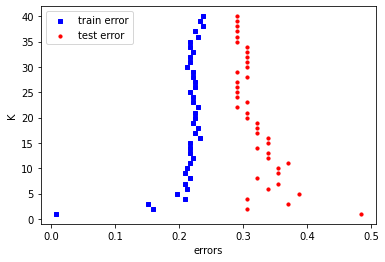

In [27]:
import matplotlib.pyplot as plt


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train_error, ks, s=10, c='b', marker="s", label='train error')
ax1.scatter(test_error ,ks, s=10, c='r', marker="o", label='test error')

plt.legend(loc='upper left')

plt.xlabel('errors')
plt.ylabel('K')

plt.show()

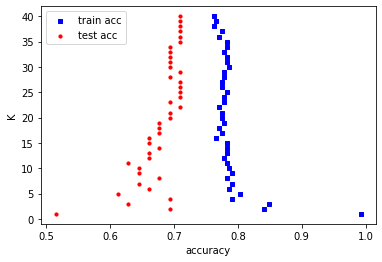

In [28]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(train_acc, ks, s=10, c='b', marker="s", label='train acc')
ax1.scatter(test_acc ,ks, s=10, c='r', marker="o", label='test acc')

plt.legend(loc='upper left')

plt.xlabel('accuracy')
plt.ylabel('K')

plt.show()

As we can see graphs above, for k = 1 the train error is too small and test error is too high

This means that our model is overfitting and not classifying proplerly

We can witness that as we increase the value of k, the results get more reasonable and we can see that the overfitting issue is gone

## ii)

In this section, we want to make predictions for k = [1, 5 , 20, 40] values

we want to see that which class gets more desirable as we increase the value of k

In [29]:
from sklearn.model_selection import KFold

In [30]:
ks = [1, 5, 20, 40]

In the following code, we save the predictions of different values of k in a list

In [31]:
preds = []
for k in ks:
    neigh = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    neigh.fit(x_train, y_train)
    error_dict.append({"k": k,
                       "train_error": neigh.score(x_train, y_train),
                       "test_error": neigh.score(x_test, y_test)})
    preds.append(neigh.predict(x_test))

In [32]:
preds

[array([1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
        2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2], dtype=int64),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,
        1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)]

In the following plots, we set y as positive cases and x as Age, then we show our predictions based on x and y by colors

Red represents class 2 and Blue represents class 1

see the following graphs for more details:

K = 1


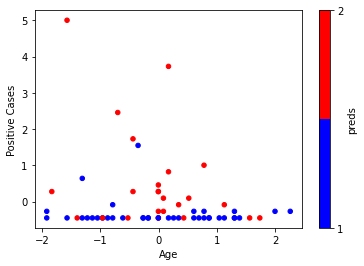

K = 5


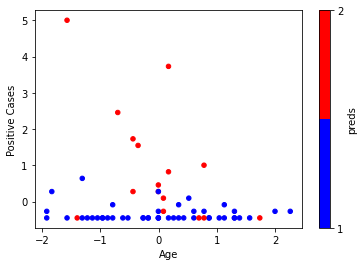

K = 20


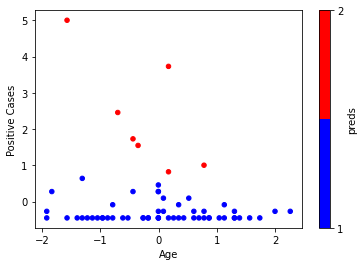

K = 40


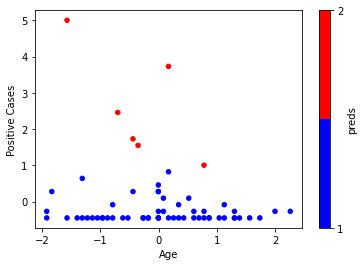

In [33]:
for i in range(4):
    print(f"K = {ks[i]}")
    plt.scatter(x_test['Age'] ,x_test['Number of positive cases'], s=20, c=preds[i], cmap=plt.cm.get_cmap('bwr', 2))
    cbar = plt.colorbar()
    cbar.set_label(label='preds', size = 10)
    cbar.set_ticks([1,2])

    plt.xlabel('Age')
    plt.ylabel('Positive Cases')

    plt.show()

As we can see,by increasing the value of k, data has more tendacy to join class 1 rather than class 2

We obviously see more Blue dots than Red dots

# iii)

In this section we want to determine the optimal k value for our KNN model

The following code just does the job by k-fold cross-validation

In [34]:
from sklearn.model_selection import cross_val_score

ks = []
x = data.drop("Survival status", axis=1)
y = data['Survival status']
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
    scores = cross_val_score(estimator=neigh, X=x , y=y, cv=3)
    ks.append((i,scores.mean()))
print(ks)

[(1, 0.7091503267973857), (2, 0.7156862745098039), (3, 0.6830065359477123), (4, 0.7189542483660131), (5, 0.6895424836601308), (6, 0.7091503267973857), (7, 0.7058823529411765), (8, 0.7124183006535948), (9, 0.7254901960784315), (10, 0.7287581699346406), (11, 0.7320261437908497), (12, 0.7352941176470589), (13, 0.7352941176470589), (14, 0.738562091503268), (15, 0.7418300653594772), (16, 0.7647058823529411), (17, 0.7679738562091503), (18, 0.7581699346405228), (19, 0.7581699346405228), (20, 0.7549019607843137), (21, 0.7581699346405228), (22, 0.7581699346405228), (23, 0.7647058823529411), (24, 0.761437908496732), (25, 0.7647058823529411), (26, 0.7647058823529411), (27, 0.7712418300653594), (28, 0.7647058823529411), (29, 0.761437908496732), (30, 0.7581699346405228), (31, 0.7516339869281046), (32, 0.7549019607843137), (33, 0.7450980392156863), (34, 0.7516339869281046), (35, 0.7483660130718954), (36, 0.7516339869281046), (37, 0.7418300653594772), (38, 0.7418300653594772), (39, 0.7418300653594772

The following code gives the best k, which is 27

In [35]:
from operator import itemgetter
max(ks,key=itemgetter(1))[0]

27